# Dermatology MNIST: Data Loading and Exploration

### Instalacion de los Datos (MedMNIST) en Local

**Nota**: Solo correr 1 vez, para instalar por primera vez

In [2]:
#%pip install medmnist

## Importacion de librerias necesarias

In [3]:
import medmnist
from medmnist import INFO, Evaluator
from medmnist.dataset import DermaMNIST

import numpy as np
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import dataset_without_pytorch
from dataset_without_pytorch import get_loader

## Carga de datos DermaMNIST

In [4]:
# Informacion del Dataset
dataset_info = INFO['dermamnist']

# Imprimir metadatos importantes del dataset
print("Nombre del Dataset: ", dataset_info['python_class'])
print("Descripción:", dataset_info['description'])
print("Etiquetas:")
for key, value in dataset_info['label'].items():
    print(f"  {key}: {value}")
print("Número de muestras:")
for key, value in dataset_info['n_samples'].items():
    print(f"  {key}: {value}")
print("Tarea:", dataset_info['task'])
print("Canales de imagenes: ", dataset_info['n_channels'])
print("Licencia:", dataset_info['license'])

Nombre del Dataset:  DermaMNIST
Descripción: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
Etiquetas:
  0: actinic keratoses and intraepithelial carcinoma
  1: basal cell carcinoma
  2: benign keratosis-like lesions
  3: dermatofibroma
  4: melanoma
  5: melanocytic nevi
  6: vascular lesions
Número de muestras:
  train: 7007
  val: 1003
  test: 2005
Tarea: multi-class
Canales de imagenes:  3
Licencia: CC BY-NC 4.0


### Datos 2D 28X28

In [5]:
data_flag = 'dermamnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info_28 = INFO[data_flag]
task_28 = info_28['task']
n_channels_28 = info_28['n_channels']
n_classes_28 = len(info_28['label'])

DataClass_28 = getattr(dataset_without_pytorch, info_28['python_class'])


# load the data
train_dataset_28 = DataClass_28(split='train', download=download)

# encapsulate data into dataloader form
train_loader_28 = get_loader(dataset=train_dataset_28, batch_size=BATCH_SIZE)

Using downloaded and verified file: C:\Users\abiab\.medmnist\dermamnist.npz


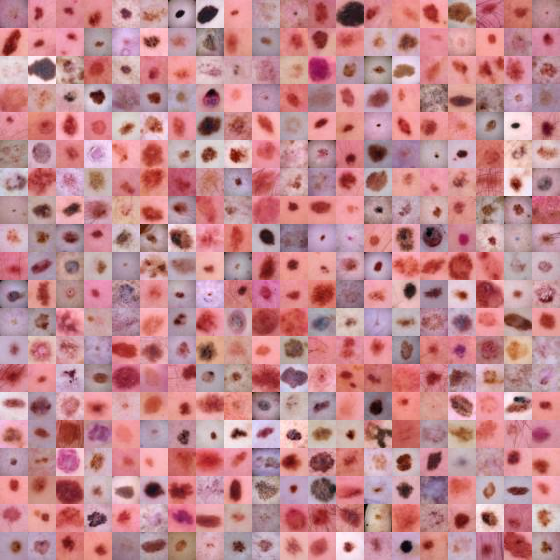

In [6]:
train_dataset_28.montage(length=20)

### Datos 2D 128x128

In [7]:
info_128 = INFO[data_flag]
task_128 = info_128['task']
n_channels_128 = info_128['n_channels']
n_classes_128 = len(info_128['label'])

DataClass_128 = getattr(dataset_without_pytorch, info_128['python_class'])

# load the data
train_dataset_128 = DataClass_128(split='train', download=download, size=128, mmap_mode='r')

# encapsulate data into dataloader form
train_loader_128 = get_loader(dataset=train_dataset_128, batch_size=BATCH_SIZE)

Using downloaded and verified file: C:\Users\abiab\.medmnist\dermamnist_128.npz


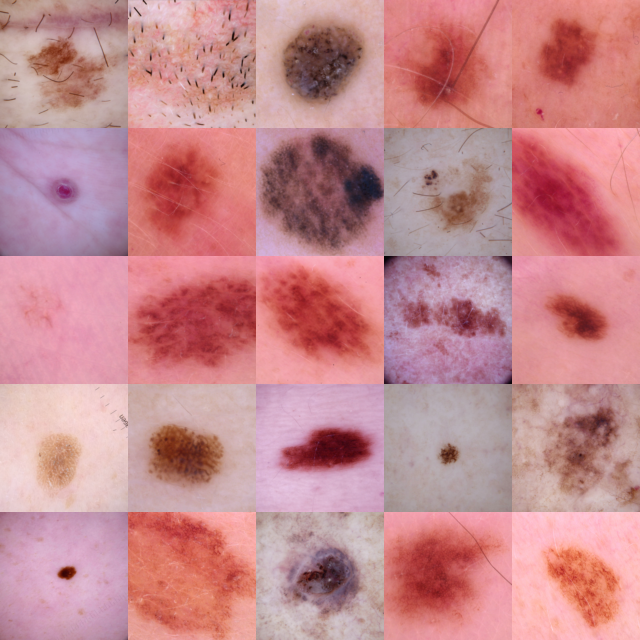

In [8]:
train_dataset_128.montage(length=5)

## Imagenes y etiquetas de datos de entrenamiento

In [9]:
images = train_dataset_28.imgs
labels = train_dataset_28.labels

In [10]:
# Lista de etiquetas con descripciones
label_descriptions = {
    0: 'Actinic Keratoses / Intraepithelial Carcinoma',
    1: 'Basal Cell Carcinoma',
    2: 'Benign Keratosis-like Lesions',
    3: 'Dermatofibroma',
    4: 'Melanoma',
    5: 'Melanocytic Nevi',
    6: 'Vascular Lesions'
}

## Visualizaciones y exploración inicial de los datos

### Conteo por etiqueta

C:\Users\abiab\AppData\Local\Temp\ipykernel_19076\54989074.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=label_counts, palette='viridis')


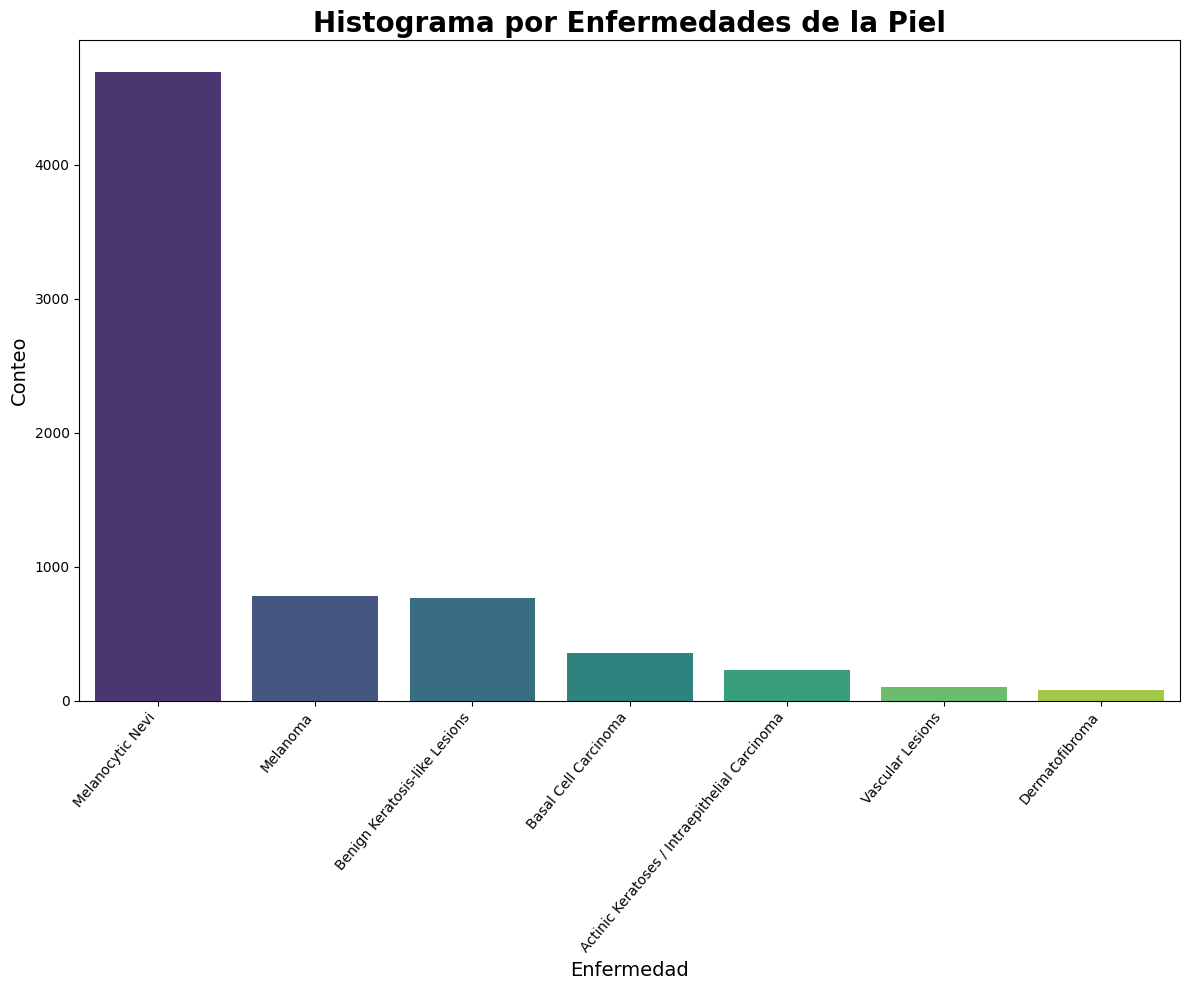

In [11]:
labels_list = [label.item() for label in labels]   
df_labels = pd.DataFrame(labels_list, columns=['label'])

# Reemplazar las etiquetas numéricas por las descripciones
df_labels['label'] = df_labels['label'].map(label_descriptions)

# Contar la frecuencia de cada etiqueta
label_counts = df_labels['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Graficar el histograma usando Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x='label', y='count', data=label_counts, palette='viridis')

# Mejorar el diseño
plt.title('Histograma por Enfermedades de la Piel', fontsize=20, weight='bold')
plt.xlabel('Enfermedad', fontsize=14)
plt.ylabel('Conteo', fontsize=14)
plt.xticks(rotation=50, ha='right', fontsize=10)  # Rotar las etiquetas para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Informacion promedio por color

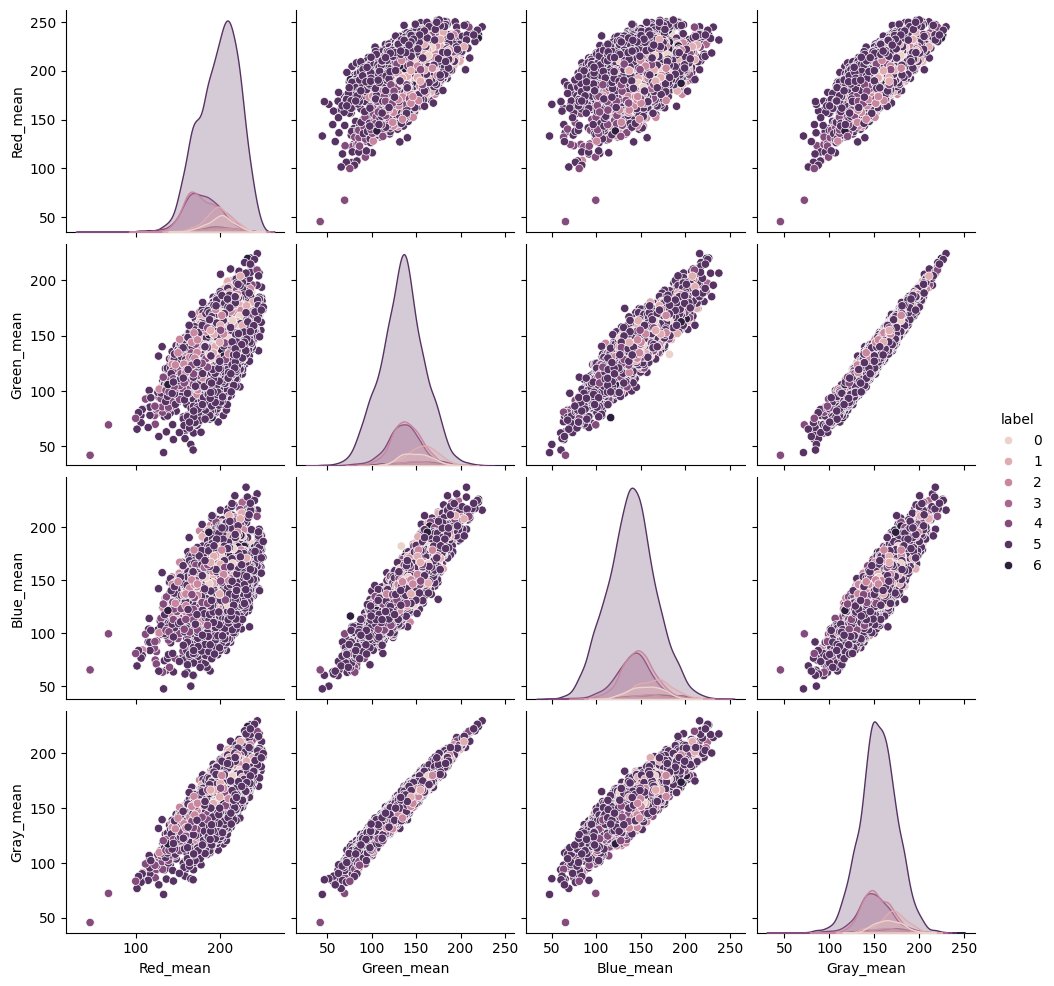

In [12]:
red_means = []
green_means = []
blue_means = []
gray_means = []
labels_m = []

i = 0

for image in images:
    red_mean = image[:, :, 0].mean()   
    green_mean = image[:, :, 1].mean() 
    blue_mean = image[:, :, 2].mean() 

    gray_mean = (0.2989 * red_mean + 0.5870 * green_mean + 0.1140 * blue_mean)

    red_means.append(red_mean)
    green_means.append(green_mean)
    blue_means.append(blue_mean)
    gray_means.append(gray_mean)
    labels_m.append(labels[i].item())
    
    i += 1
    

data = {
    'Red_mean': red_means,
    'Green_mean': green_means,
    'Blue_mean': blue_means,
    'Gray_mean': gray_means,
    'label': labels_m
}
df = pd.DataFrame(data)

sns.pairplot(df, hue='label', diag_kind='kde')

plt.show()

### Distribuciones por etiqueta y canal RGB

C:\Users\abiab\AppData\Local\Temp\ipykernel_19076\1642654289.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Red_mean', data=df, palette='Reds', ax=axs[0])
C:\Users\abiab\AppData\Local\Temp\ipykernel_19076\1642654289.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Green_mean', data=df, palette='Greens', ax=axs[1])
C:\Users\abiab\AppData\Local\Temp\ipykernel_19076\1642654289.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Blue_mean', data=df, palette='Blues', ax=axs[2])


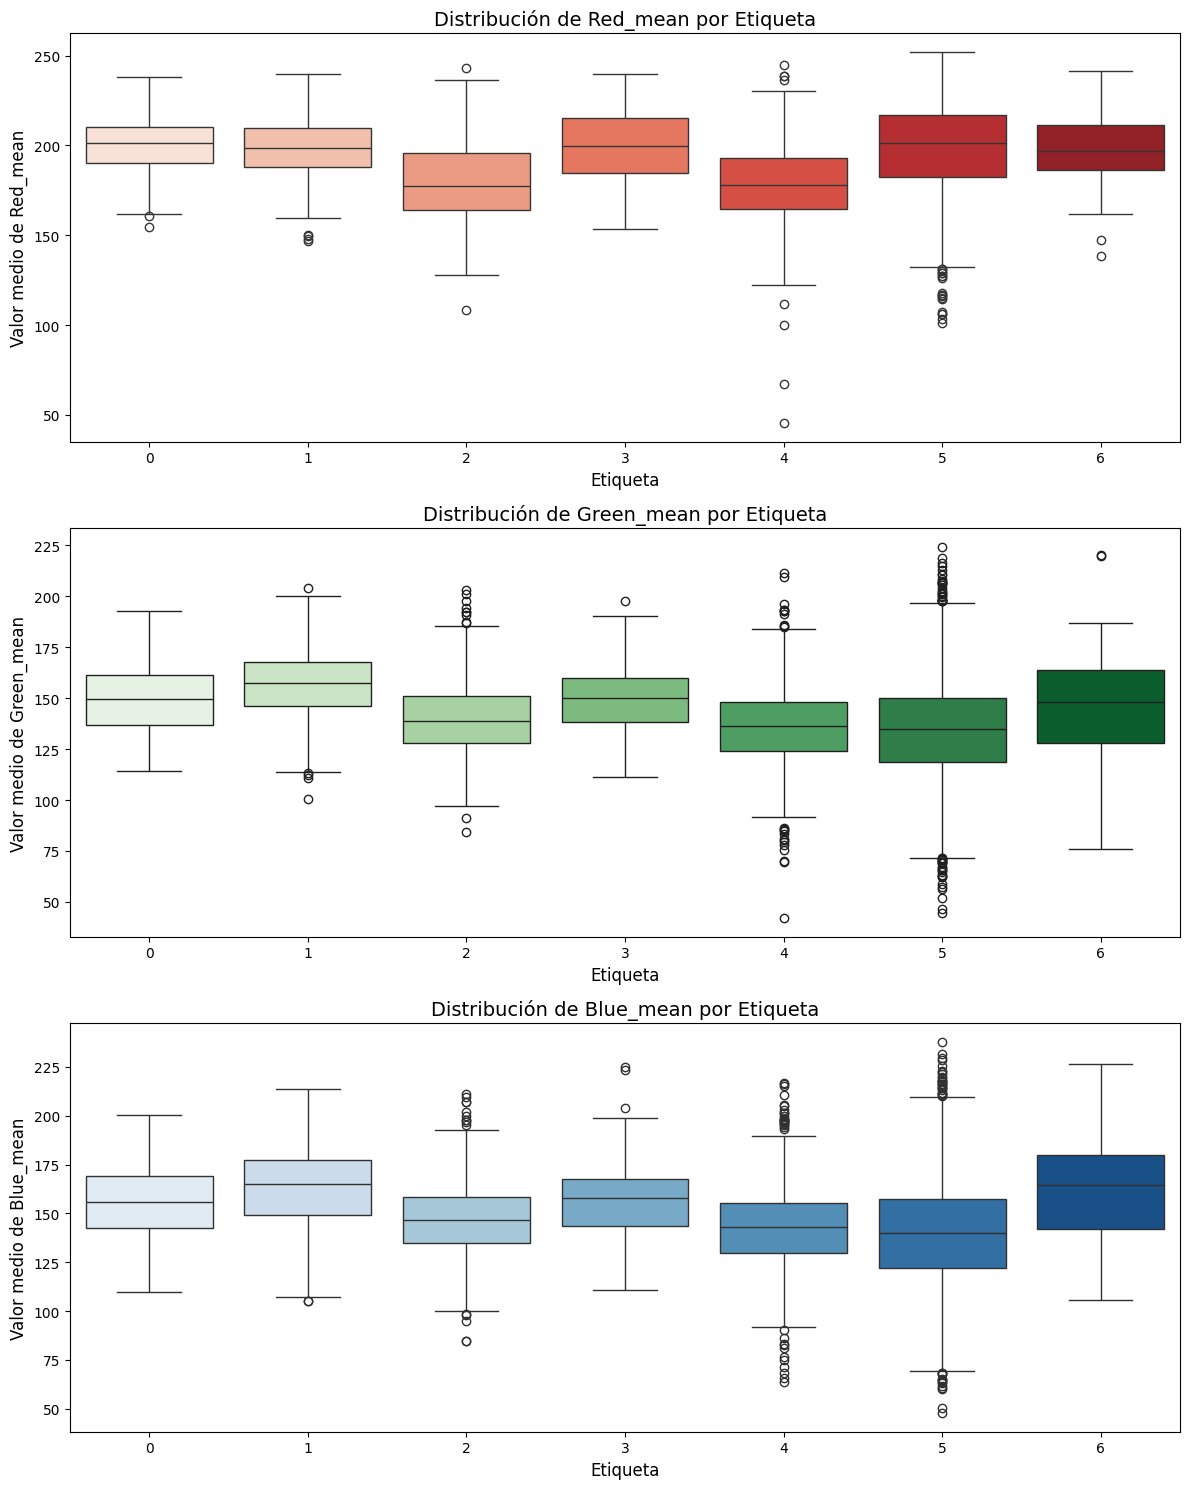

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# 1. Gráfico para el canal Rojo (Red_mean)
sns.boxplot(x='label', y='Red_mean', data=df, palette='Reds', ax=axs[0])
axs[0].set_title('Distribución de Red_mean por Etiqueta', fontsize=14)
axs[0].set_xlabel('Etiqueta', fontsize=12)
axs[0].set_ylabel('Valor medio de Red_mean', fontsize=12)

# 2. Gráfico para el canal Verde (Green_mean)
sns.boxplot(x='label', y='Green_mean', data=df, palette='Greens', ax=axs[1])
axs[1].set_title('Distribución de Green_mean por Etiqueta', fontsize=14)
axs[1].set_xlabel('Etiqueta', fontsize=12)
axs[1].set_ylabel('Valor medio de Green_mean', fontsize=12)

# 3. Gráfico para el canal Azul (Blue_mean)
sns.boxplot(x='label', y='Blue_mean', data=df, palette='Blues', ax=axs[2])
axs[2].set_title('Distribución de Blue_mean por Etiqueta', fontsize=14)
axs[2].set_xlabel('Etiqueta', fontsize=12)
axs[2].set_ylabel('Valor medio de Blue_mean', fontsize=12)

plt.tight_layout()

plt.show()

### Distribuci[on de los datos RGB por etiqueta (Enfermedad)

#### Histogramas de colores RGB 28x28

In [14]:
images_28 = train_dataset_28.imgs
images_label_28 = train_dataset_28.labels

# 0: actinic keratoses and intraepithelial carcinoma
# 1: basal cell carcinoma
# 2: benign keraosis-like lesions
# 3: dermatofibroma
# 4: melanoma
# 5: melanocytic nevi
# 6: vascular lesions

actinic_keratoses_intraepithelial_carcinoma_28 = []
basal_cell_carcinoma_28 = []
benign_keratosis_like_lesions_28 = []
dermatofibroma_28 = []
melanoma_28 = []
melanocytic_nevi_28 = []
vascular_lesions_28 = []


for img,il in zip(images_28, images_label_28):
    match il:
        case 0:
            actinic_keratoses_intraepithelial_carcinoma_28.append(img)
        case 1:
            basal_cell_carcinoma_28.append(img)
        case 2:
            benign_keratosis_like_lesions_28.append(img)
        case 3:
            dermatofibroma_28.append(img)
        case 4:
            melanoma_28.append(img)
        case 5:
            melanocytic_nevi_28.append(img)
        case 6:
            vascular_lesions_28.append(img)
            

actinic_keratoses_intraepithelial_carcinoma_28 = np.array(actinic_keratoses_intraepithelial_carcinoma_28)
basal_cell_carcinoma_28 = np.array(basal_cell_carcinoma_28)
benign_keratosis_like_lesions_28 = np.array(benign_keratosis_like_lesions_28)
dermatofibroma_28 = np.array(dermatofibroma_28)
melanoma_28 = np.array(melanoma_28)
melanocytic_nevi_28 = np.array(melanocytic_nevi_28)
vascular_lesions_28 = np.array(vascular_lesions_28)

print("actinic_keratoses_intraepithelial_carcinoma_28 shape:", actinic_keratoses_intraepithelial_carcinoma_28.shape)
print("basal_cell_carcinoma_28 shape:", basal_cell_carcinoma_28.shape)
print("benign_keratosis_like_lesions_28 shape:", benign_keratosis_like_lesions_28.shape)
print("dermatofibroma_28 shape:", dermatofibroma_28.shape)
print("melanoma_28 shape:", melanoma_28.shape)
print("melanocytic_nevi_28 shape:", melanocytic_nevi_28.shape)
print("vascular_lesions_28 shape:", vascular_lesions_28.shape)

actinic_keratoses_intraepithelial_carcinoma_28 shape: (228, 28, 28, 3)
basal_cell_carcinoma_28 shape: (359, 28, 28, 3)
benign_keratosis_like_lesions_28 shape: (769, 28, 28, 3)
dermatofibroma_28 shape: (80, 28, 28, 3)
melanoma_28 shape: (779, 28, 28, 3)
melanocytic_nevi_28 shape: (4693, 28, 28, 3)
vascular_lesions_28 shape: (99, 28, 28, 3)


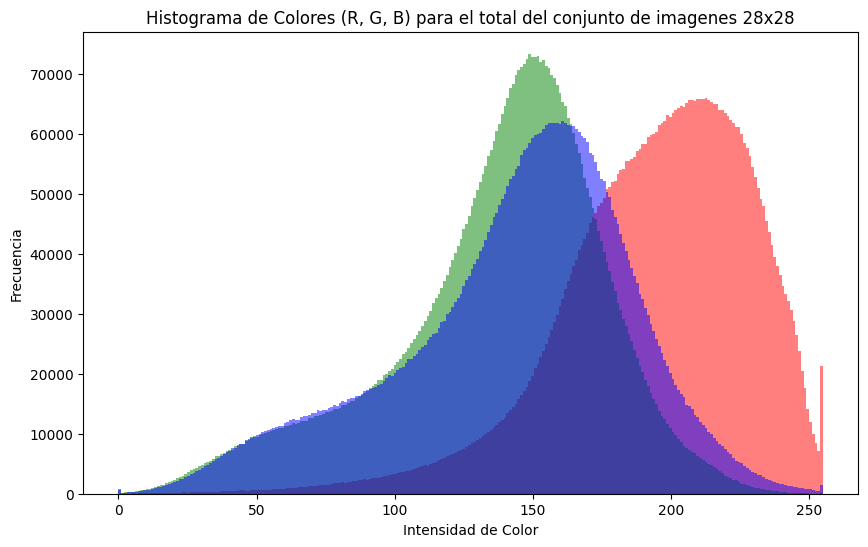

In [15]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(images_28[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para el total del conjunto de imagenes 28x28')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

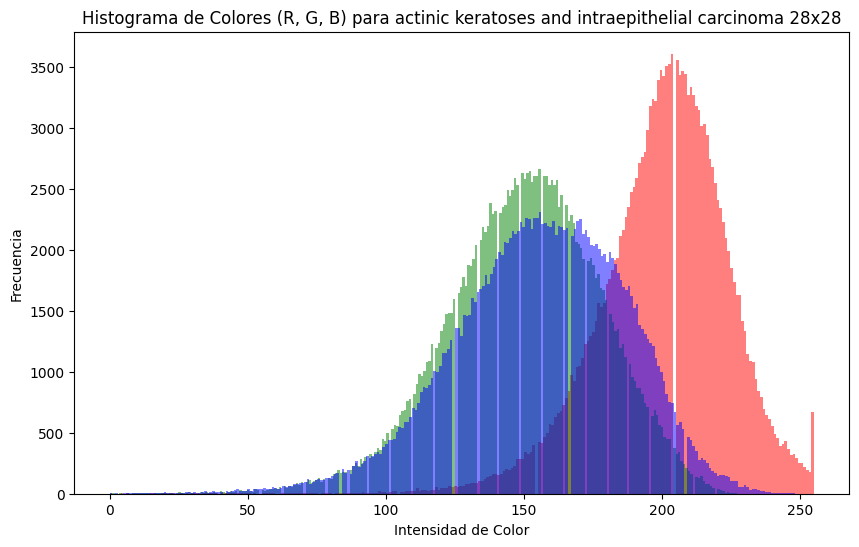

In [16]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(actinic_keratoses_intraepithelial_carcinoma_28[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para actinic keratoses and intraepithelial carcinoma 28x28')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

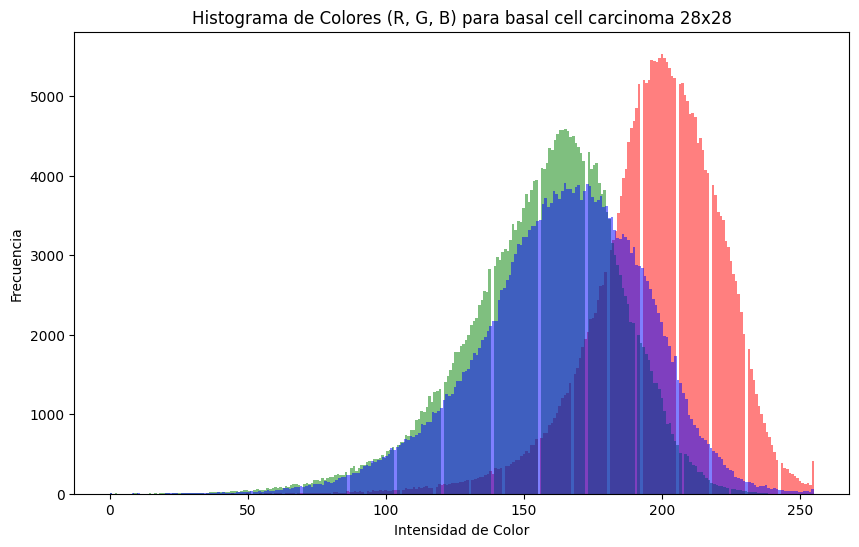

In [17]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(basal_cell_carcinoma_28[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para basal cell carcinoma 28x28')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

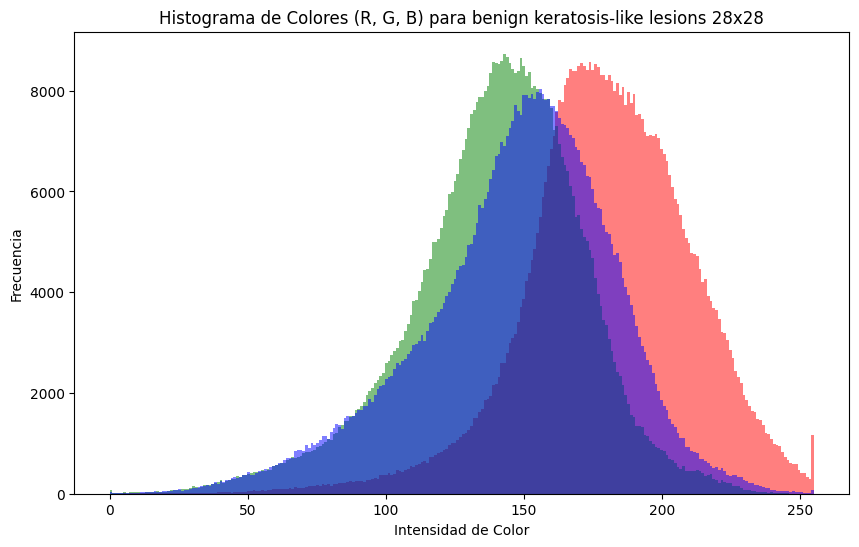

In [18]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(benign_keratosis_like_lesions_28[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para benign keratosis-like lesions 28x28')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

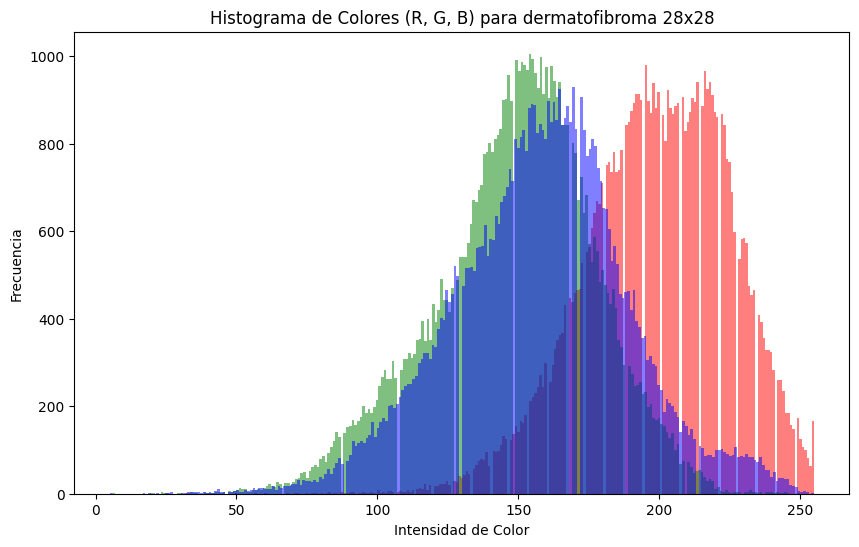

In [19]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(dermatofibroma_28[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para dermatofibroma 28x28')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()


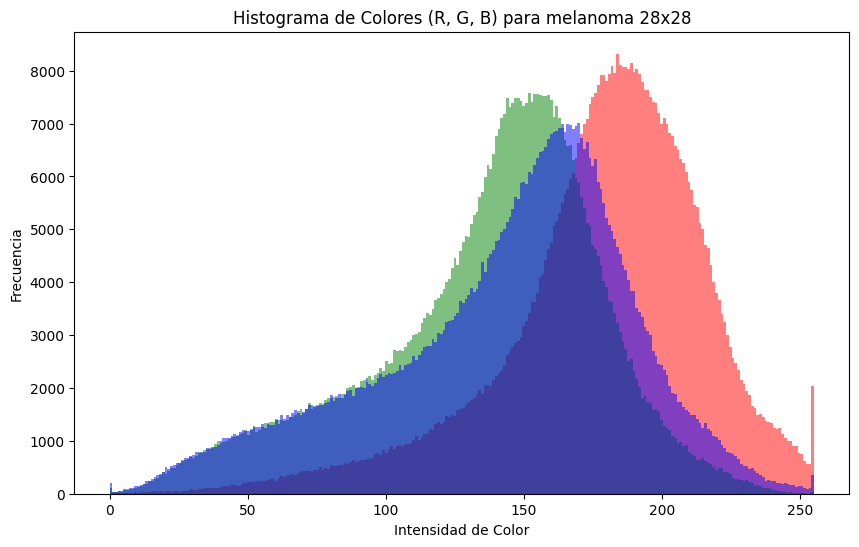

In [20]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(melanoma_28[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para melanoma 28x28')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

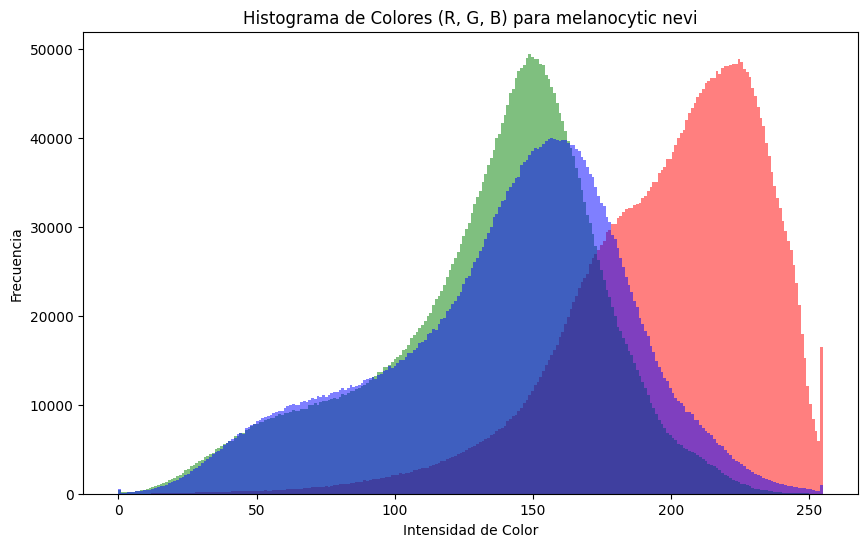

In [21]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(melanocytic_nevi_28[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para melanocytic nevi')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

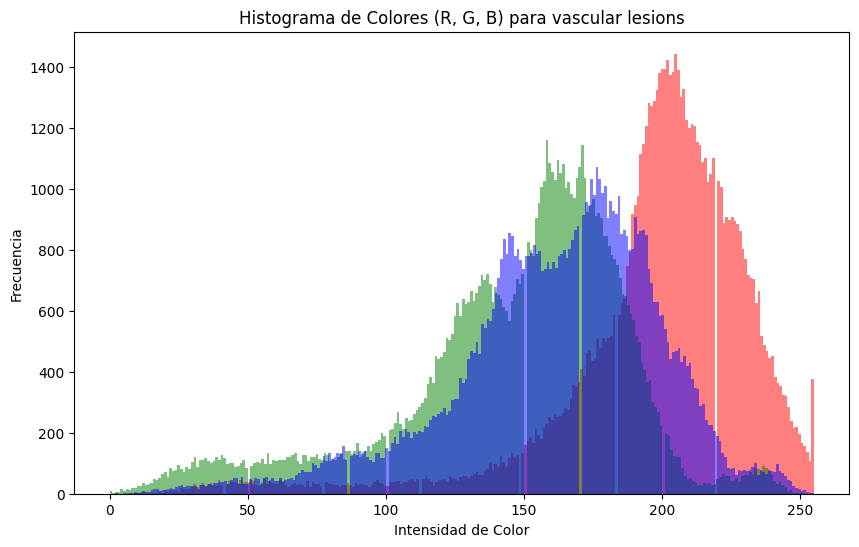

In [22]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(vascular_lesions_28[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para vascular lesions')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

#### Histograma de colores RGB 128x128

In [23]:
images_128 = train_dataset_128.imgs
images_label_128 = train_dataset_128.labels

# 0: actinic keratoses and intraepithelial carcinoma
# 1: basal cell carcinoma
# 2: benign keraosis-like lesions
# 3: dermatofibroma
# 4: melanoma
# 5: melanocytic nevi
# 6: vascular lesions

actinic_keratoses_intraepithelial_carcinoma_128 = []
basal_cell_carcinoma_128 = []
benign_keratosis_like_lesions_128 = []
dermatofibroma_128 = []
melanoma_128 = []
melanocytic_nevi_128 = []
vascular_lesions_128 = []


for img,il in zip(images_128, images_label_128):
    match il:
        case 0:
            actinic_keratoses_intraepithelial_carcinoma_128.append(img)
        case 1:
            basal_cell_carcinoma_128.append(img)
        case 2:
            benign_keratosis_like_lesions_128.append(img)
        case 3:
            dermatofibroma_128.append(img)
        case 4:
            melanoma_128.append(img)
        case 5:
            melanocytic_nevi_128.append(img)
        case 6:
            vascular_lesions_128.append(img)
            

actinic_keratoses_intraepithelial_carcinoma_128 = np.array(actinic_keratoses_intraepithelial_carcinoma_128)
basal_cell_carcinoma_128 = np.array(basal_cell_carcinoma_128)
benign_keratosis_like_lesions_128 = np.array(benign_keratosis_like_lesions_128)
dermatofibroma_128 = np.array(dermatofibroma_128)
melanoma_128 = np.array(melanoma_128)
melanocytic_nevi_128 = np.array(melanocytic_nevi_128)
vascular_lesions_128 = np.array(vascular_lesions_128)

print("actinic_keratoses_intraepithelial_carcinoma_128 shape:", actinic_keratoses_intraepithelial_carcinoma_128.shape)
print("basal_cell_carcinoma_128 shape:", basal_cell_carcinoma_128.shape)
print("benign_keratosis_like_lesions_128 shape:", benign_keratosis_like_lesions_128.shape)
print("dermatofibroma_128 shape:", dermatofibroma_128.shape)
print("melanoma_128 shape:", melanoma_128.shape)
print("melanocytic_nevi_128 shape:", melanocytic_nevi_128.shape)
print("vascular_lesions_128 shape:", vascular_lesions_128.shape)

actinic_keratoses_intraepithelial_carcinoma_128 shape: (228, 128, 128, 3)
basal_cell_carcinoma_128 shape: (359, 128, 128, 3)
benign_keratosis_like_lesions_128 shape: (769, 128, 128, 3)
dermatofibroma_128 shape: (80, 128, 128, 3)
melanoma_128 shape: (779, 128, 128, 3)
melanocytic_nevi_128 shape: (4693, 128, 128, 3)
vascular_lesions_128 shape: (99, 128, 128, 3)


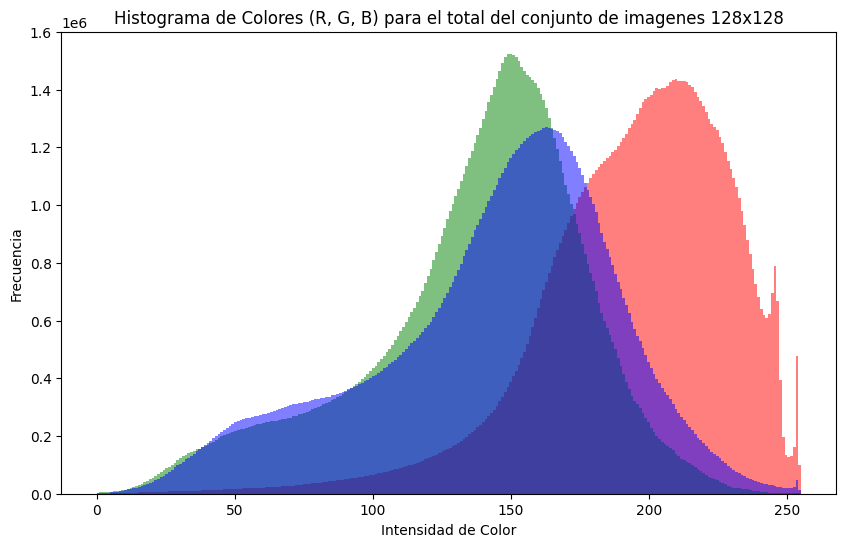

In [24]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(images_128[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para el total del conjunto de imagenes 128x128')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

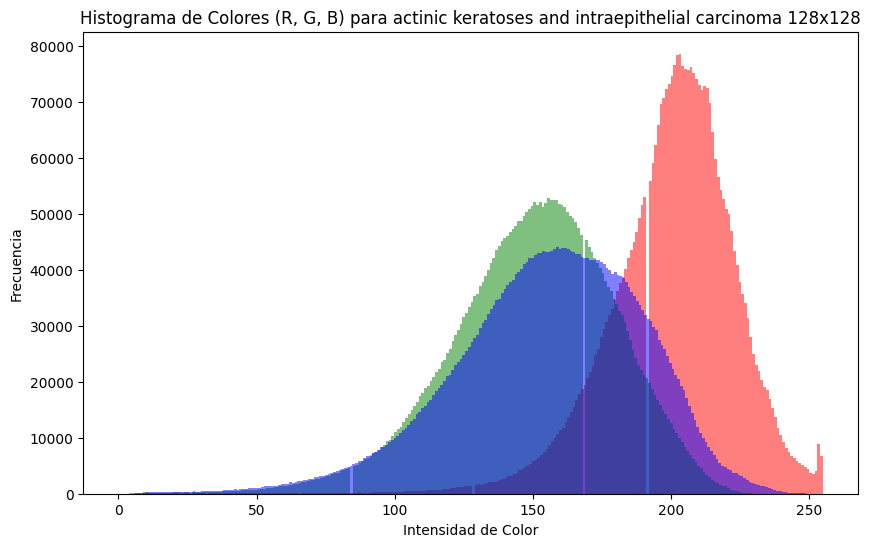

In [25]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(actinic_keratoses_intraepithelial_carcinoma_128[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para actinic keratoses and intraepithelial carcinoma 128x128')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

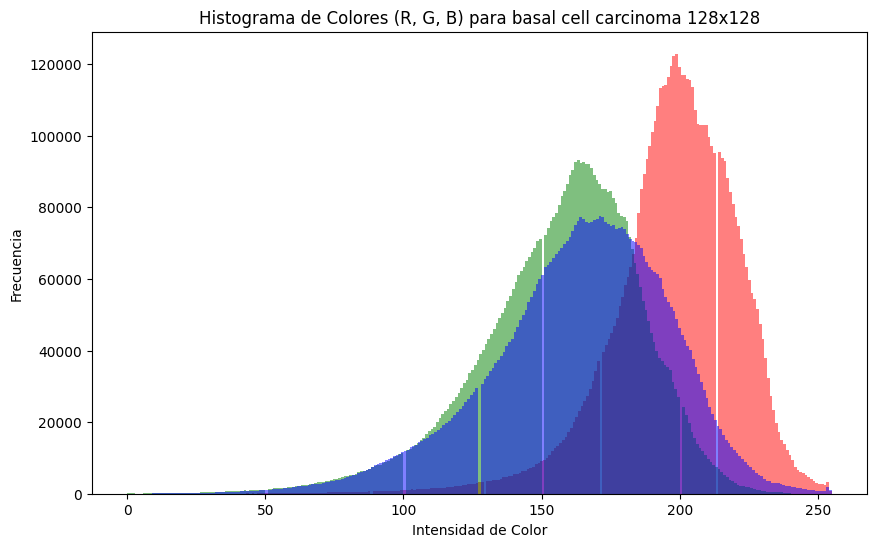

In [26]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(basal_cell_carcinoma_128[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para basal cell carcinoma 128x128')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

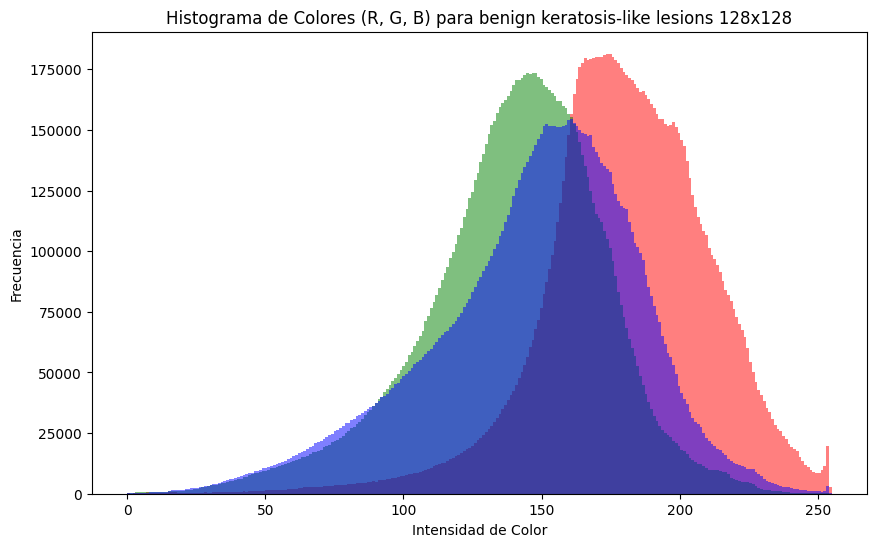

In [27]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(benign_keratosis_like_lesions_128[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para benign keratosis-like lesions 128x128')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

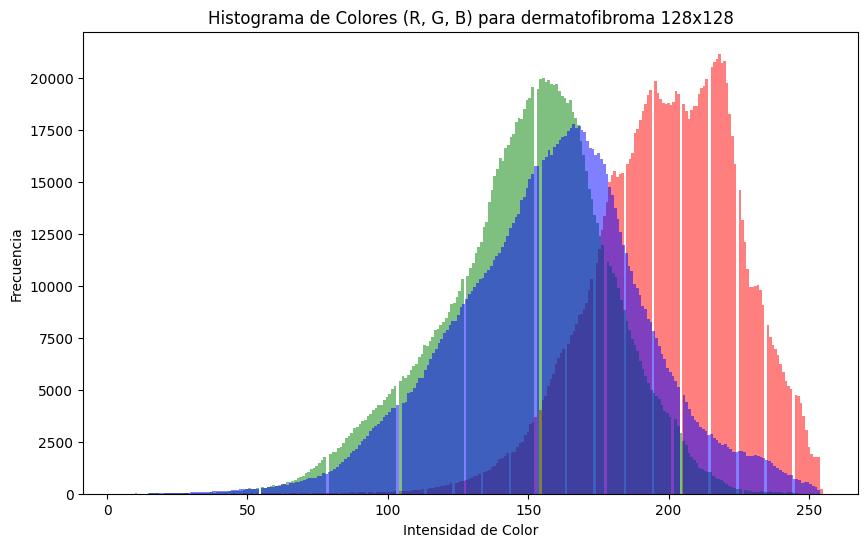

In [28]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(dermatofibroma_128[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para dermatofibroma 128x128')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

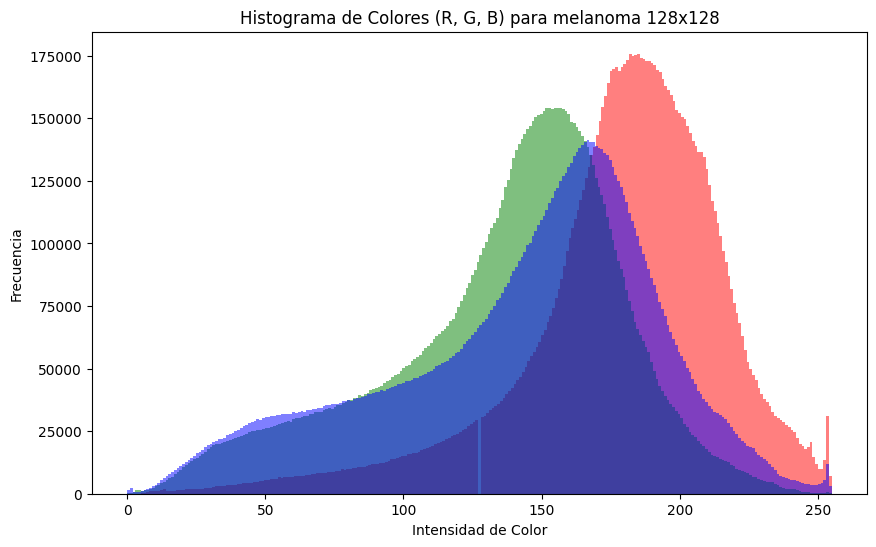

In [29]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(melanoma_128[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para melanoma 128x128')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

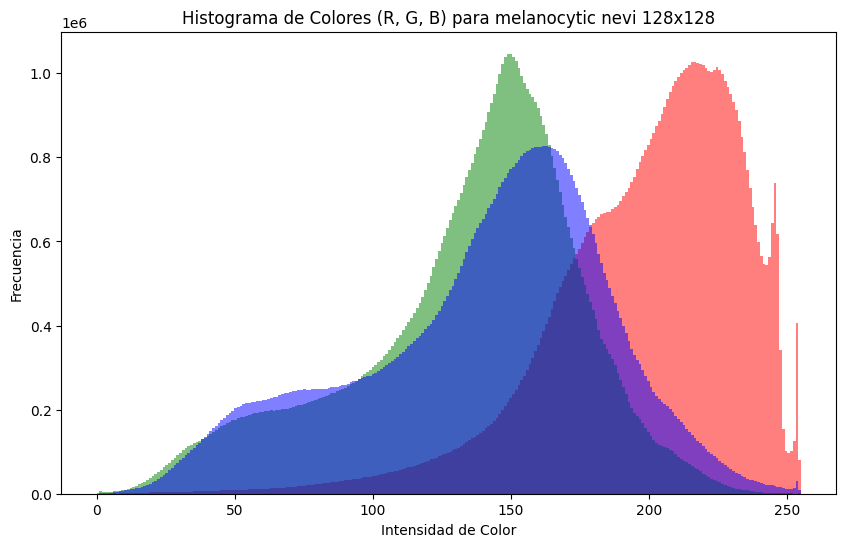

In [30]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(melanocytic_nevi_128[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para melanocytic nevi 128x128')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

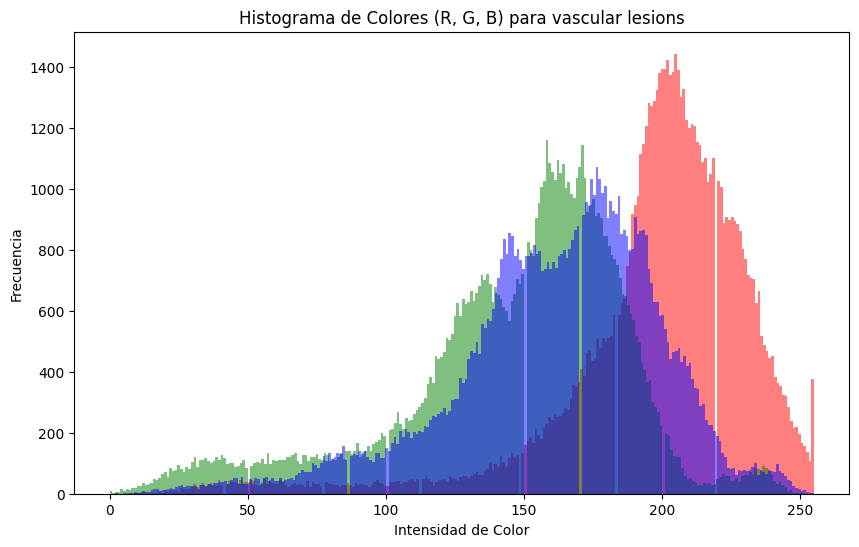

In [31]:
plt.figure(figsize=(10, 6))
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    plt.hist(vascular_lesions_28[:, :, :, i].ravel(), bins=256, color=color, alpha=0.5)
plt.title('Histograma de Colores (R, G, B) para vascular lesions')
plt.xlabel('Intensidad de Color')
plt.ylabel('Frecuencia')
plt.show()

### Tendencia de Color Basada en la Intensidad de los Canales RGB

#### Mapa de intensidad para RGB 28x28

In [ ]:
# Crear subplots (una fila, tres columnas para los canales RGB)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Lista de colores y títulos para los subplots
colores = ['Rojo', 'Verde', 'Azul']

# Generar las imágenes promedio por canal
for i in range(3):
    imagen_promedio = np.mean(images_28[:, :, :, i], axis=0)
    
    # Mostrar cada imagen en un subplot
    ax = axes[i]
    ax.imshow(imagen_promedio)
    ax.set_title(f'Canal {colores[i]}')
    ax.axis('off')

# Mostrar las imágenes juntas
plt.tight_layout()
plt.show()

In [ ]:
# Crear subplots (una fila, tres columnas para los canales RGB)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Lista de colores y títulos para los subplots
colores = ['Rojo', 'Verde', 'Azul']

# Generar las imágenes promedio por canal
for i in range(3):
    imagen_promedio = np.mean(actinic_keratoses_intraepithelial_carcinoma_28[:, :, :, i], axis=0)
    
    # Mostrar cada imagen en un subplot
    ax = axes[i]
    ax.imshow(imagen_promedio)
    ax.set_title(f'Canal {colores[i]}')
    ax.axis('off')

# Mostrar las imágenes juntas
plt.tight_layout()
plt.show()

In [ ]:
# Crear subplots (una fila, tres columnas para los canales RGB)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Lista de colores y títulos para los subplots
colores = ['Rojo', 'Verde', 'Azul']

# Generar las imágenes promedio por canal
for i in range(3):
    imagen_promedio = np.mean(basal_cell_carcinoma_28[:, :, :, i], axis=0)
    
    # Mostrar cada imagen en un subplot
    ax = axes[i]
    ax.imshow(imagen_promedio)
    ax.set_title(f'Canal {colores[i]}')
    ax.axis('off')

# Mostrar las imágenes juntas
plt.tight_layout()
plt.show()

In [ ]:
# Crear subplots (una fila, tres columnas para los canales RGB)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Lista de colores y títulos para los subplots
colores = ['Rojo', 'Verde', 'Azul']

# Generar las imágenes promedio por canal
for i in range(3):
    imagen_promedio = np.mean(benign_keratosis_like_lesions_28[:, :, :, i], axis=0)
    
    # Mostrar cada imagen en un subplot
    ax = axes[i]
    ax.imshow(imagen_promedio)
    ax.set_title(f'Canal {colores[i]}')
    ax.axis('off')

# Mostrar las imágenes juntas
plt.tight_layout()
plt.show()

In [ ]:
# Crear subplots (una fila, tres columnas para los canales RGB)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Lista de colores y títulos para los subplots
colores = ['Rojo', 'Verde', 'Azul']

# Generar las imágenes promedio por canal
for i in range(3):
    imagen_promedio = np.mean(dermatofibroma_28[:, :, :, i], axis=0)
    
    # Mostrar cada imagen en un subplot
    ax = axes[i]
    ax.imshow(imagen_promedio)
    ax.set_title(f'Canal {colores[i]}')
    ax.axis('off')

# Mostrar las imágenes juntas
plt.tight_layout()
plt.show()

In [ ]:
# Crear subplots (una fila, tres columnas para los canales RGB)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Lista de colores y títulos para los subplots
colores = ['Rojo', 'Verde', 'Azul']

# Generar las imágenes promedio por canal
for i in range(3):
    imagen_promedio = np.mean(melanoma_28[:, :, :, i], axis=0)
    
    # Mostrar cada imagen en un subplot
    ax = axes[i]
    ax.imshow(imagen_promedio)
    ax.set_title(f'Canal {colores[i]}')
    ax.axis('off')

# Mostrar las imágenes juntas
plt.tight_layout()
plt.show()

In [ ]:
# Crear subplots (una fila, tres columnas para los canales RGB)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Lista de colores y títulos para los subplots
colores = ['Rojo', 'Verde', 'Azul']

# Generar las imágenes promedio por canal
for i in range(3):
    imagen_promedio = np.mean(melanocytic_nevi_28[:, :, :, i], axis=0)
    
    # Mostrar cada imagen en un subplot
    ax = axes[i]
    ax.imshow(imagen_promedio)
    ax.set_title(f'Canal {colores[i]}')
    ax.axis('off')

# Mostrar las imágenes juntas
plt.tight_layout()
plt.show()

In [ ]:
# Crear subplots (una fila, tres columnas para los canales RGB)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Lista de colores y títulos para los subplots
colores = ['Rojo', 'Verde', 'Azul']

# Generar las imágenes promedio por canal
for i in range(3):
    imagen_promedio = np.mean(vascular_lesions_28[:, :, :, i], axis=0)
    
    # Mostrar cada imagen en un subplot
    ax = axes[i]
    ax.imshow(imagen_promedio)
    ax.set_title(f'Canal {colores[i]}')
    ax.axis('off')

# Mostrar las imágenes juntas
plt.tight_layout()
plt.show()

#### Mapa de intensidad para RGB 128x128